In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
from statsmodels.graphics.tsaplots import plot_acf

# Práctica 3: Prepocesamiento de Series de Tiempo

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye una serie de tiempo real. El dataset importado incluye cuatro series de tiempo de la ciudad de Delhi, India, desde el 1 de enero de 2013 al 1 de enero de 2017 en muestreos diarios. Las series de tiempo incluidas son:

- __meantemp__: Temperatura promedio del día.
- __humidity__: Humedad promedio del día.
- __wind_speed__: Velocidad promedio del viento en el día.
- __meanpressure__: Presión promedio del día.

Este conjunto de datos no contiene datos nulos, por lo que no es necesario realizar una imputación dedatos.

In [3]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["date"] = pd.to_datetime(df["date"])
df.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


## Asignación 1 &#x1F625;

La serie de tiempo __meanpressure__ contiene outliers. Analice la serie de tiempo y con base en su análisis, sustituya los outliers por valores válidos.

Text(0.5, 1.0, 'Datos con outliers')

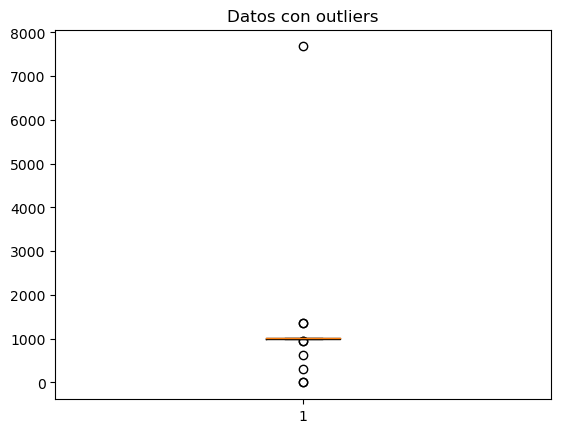

In [4]:
fig, ax = plt.subplots(nrows = 1)
ax.boxplot(df.meanpressure)
# ax.set_ylim(980,1150)
ax.set_title('Datos con outliers')

In [5]:
# Calculamos los cuartiles correspondientes
qs = df.meanpressure.quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

# Definimos limite inferior y superior
iqr = q3 - q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Reemplazamos los valores
df.meanpressure = np.where(df.meanpressure > iqr_lim_sup,
         iqr_lim_sup, df.meanpressure)
df.meanpressure = np.where(df.meanpressure<iqr_lim_inf,
                 iqr_lim_inf, df.meanpressure)

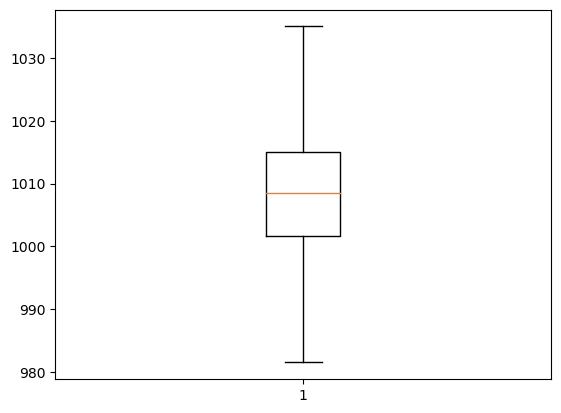

In [6]:
plt.boxplot(df.meanpressure)
plt.show()

## Asignación 2 &#x1F625;

Normalice todas las series de tiempo para que tengan media cero y varianza 1.  Imprima la descripción del dataframe para validar.

In [7]:
# Inicializamos un dataframe vacio para almacenar los valores normalizados
data = pd.DataFrame()

data['date'] = df.date

# Vamos columna por columna normalizando
for col in df.columns:
    # Omitimos la variable de la fecha
    if col != 'date':
        data[col] = ((df[col] - np.mean(df[col])) / np.std(df[col]))

data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.336520e-17,1.910616e-16,5.727293e-16,1.948792e-13
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-3.463587e+00
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-8.611749e-01
50%,3.020541e-01,1.105528e-01,-1.273107e-01,4.535292e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,8.737667e-01
max,1.799551e+00,2.340044e+00,7.766988e+00,3.476179e+00


## Asignación 3 &#x1F625;

Entrene una regresión lineal para predecir el valor de __meantemp__ utilizando las series de tiempo __humidity__, __wind_speed__ y __meanpressure__. Use la función _numpy.linalg.lstsq_ para esto. Una vez entrenada la regresión, grafique la serie de tiempo __meantemp__ junto con la serie de tiempo de las predicciones del modelo.

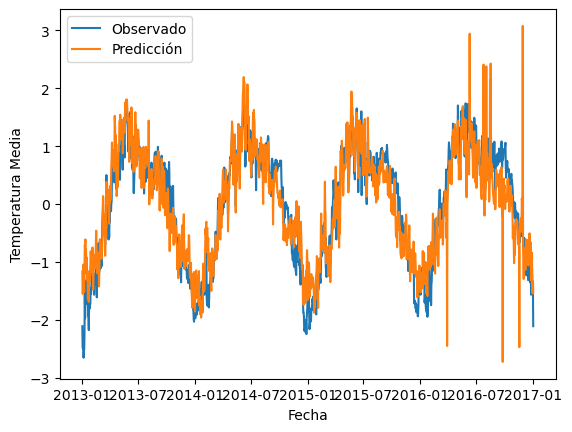

In [8]:
X = data[['humidity', 'wind_speed', 'meanpressure']].values
y = data['meantemp'].values

# Entrenamos el modelo
w, _, _, _ = np.linalg.lstsq(X, y, rcond=-1)

# Calcula las predicciones del modelo utliizando las variables independientes
y_pred = np.dot(X, w)

# Graficamos la serie de tiempo meantemp junto con el modelo
plt.plot(data.date, data.meantemp, label='Observado')
plt.plot(data.date, y_pred, label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Media')
plt.legend()
plt.show()



## Asignación 4 &#x1F643;

La serie de tiempo __meantemp__ presenta ciclos por temporadas y una ligera tendencia creciente. Entrene una regresión lineal donde las variables independientes estén en función del tiempo que permita replicar estas tendencias. En una sola gráfica imprima la serie de tiempo __meantemp__, la gráfica de la tendencia (predicciones del modelo) y la gráfica sin tendencia, es decir, la resta de la serie de tiempo __meantemp__ y las predicciones del modelo (residuales).

Nota: Utilice una frecuencia fija de $1/365$ para replicar los ciclos.

In [9]:
# Metodo analitico de la tendencia:
d = data.meantemp

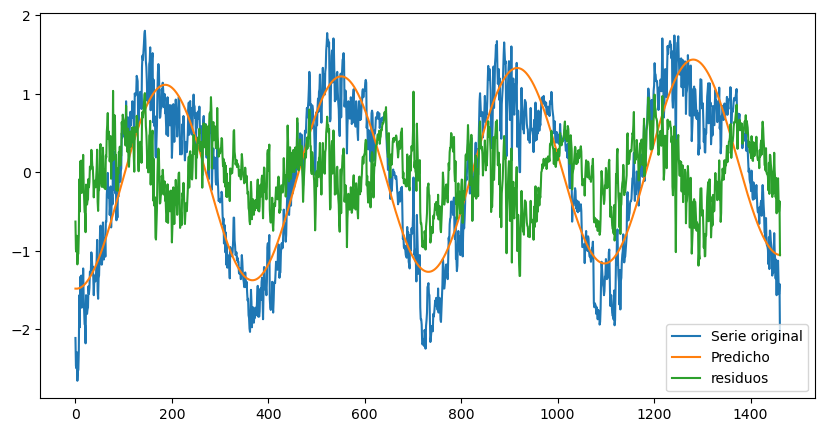

In [36]:
t = np.arange(len(data.date))

frecuencia = 1/365
cos = np.cos(2*np.pi * frecuencia* t)
sin = np.sin(2*np.pi * frecuencia * t)

# sen = np.sen()
x = pd.DataFrame(
    {'Bayes': np.ones(shape=len(data.date)),
     'tiempo' : t, 
     'tiempo mas cos' : cos,
     'tiempo mas sin' : sin}
)

w, residual, b, c = np.linalg.lstsq(x, data.meantemp, rcond=1)


y_pred = np.dot(x, w)

residuos = data.meantemp - y_pred

# tendencia = np.dot(x, _)

plt.figure(figsize=(10,5))
plt.plot(data.meantemp, label ='Serie original')
plt.plot(y_pred, label='Predicho')
plt.plot(residuos, label='residuos')
plt.legend()
plt.show()

## Asignación 5 &#x1F643;

Elimine las tendencias de la serie de tiempo __meantemp__ utilizando diferencias de primero orden. Debe realizar dos diferencias, una para eliminar la tendencia creciente y otra para eliminar los ciclos por temporadas. Grafique la serie de tiempo de __meantemp__ junto con la serie de tiempo estacionaria.

eliminar ciclo:
$$x_t = x_t - x_{t-365}$$

In [30]:
def generate_diff(data : pd.Series, ciclica : bool):
    """
    Funcion que genera una diferencia de primer grado.

    Entradas:
    data : Una serie de pandas que contiene los datos a los que se le va a realizar la diferencia de primer grado

    Salidas:
    Una serie de pandas que contiene la diferencia de la serie de tiempo
    """
    
    aux = np.zeros(shape=np.shape(data)[0])
    
    # Comprobamos si queremos eliminar los ciclos
    if not ciclica:
        for i in range(1, np.shape(data)[0]):
            aux[i-1] = data[i] - data[i - 1]  
                
        return aux
    else:
        # Copiamos los primeros 365 valores
        print('quitamos la estacionaridad')
        aux[:365] = data[:365]
        
        for i in range(365, np.shape(data)[0]):
            # Calculamos la diferencia
            # print(data[i] - data[i-365])
            aux[i] = data[i] - data[i - 365]

        return data

quitamos la estacionaridad


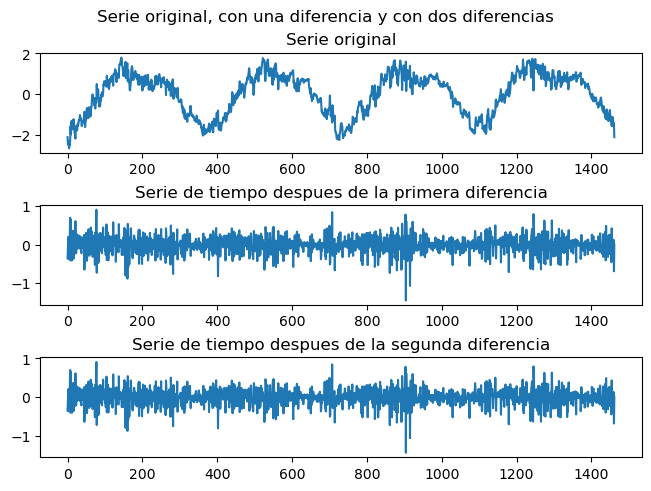

In [31]:
fig, (ax, ax1, ax2) = plt.subplots(nrows= 3, layout="constrained")

# Grafica de la serie de tiempo original
ax.plot(data.meantemp)
ax.set_title('Serie original')

# Grafica de la serie de tiempo con la primera diferencia
aux = generate_diff(data.meantemp, False)
ax1.plot(aux)
ax1.set_title('Serie de tiempo despues de la primera diferencia')

# Grafica con la segunda diferencia
temp = generate_diff(aux, True)
ax2.plot(temp)
ax2.set_title('Serie de tiempo despues de la segunda diferencia')

fig.suptitle('Serie original, con una diferencia y con dos diferencias')
plt.show()

## Asignación 6 &#x1F643;

Grafique el correlograma de la serie de tiempo __meantemp__ y el correlograma de __meantemp__ diferenciada (estacionaria). Utilice la función _plot_acf_ para graficar el correlograma.

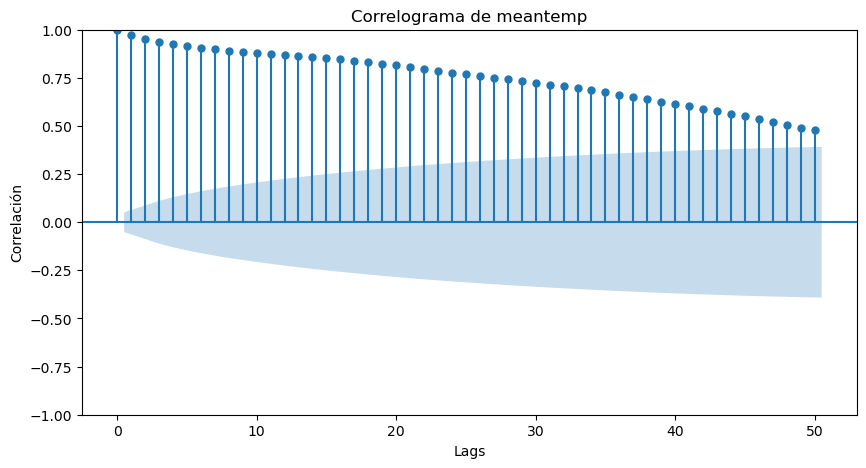

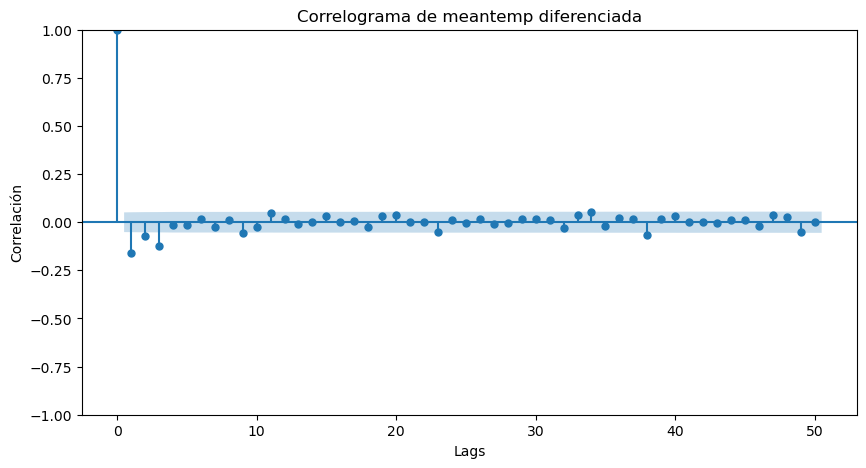

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(data['meantemp'], lags=50, ax=ax)
plt.title('Correlograma de meantemp')
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
plot_acf(temp, lags=50, ax=ax)
plt.title('Correlograma de meantemp diferenciada')
plt.xlabel('Lags')
plt.ylabel('Correlación')
plt.show()